レイリーフェージングに関する解析  
振幅に関して、レイリー分布のピークとの関係を調べる

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import rayleigh

np.random.seed(42)

複素振幅は円対称複素ガウス分布に従う  
複素振幅 $H=X+jY$　は $H \sim \mathcal{CN}(0,1)$に従うようにした

In [3]:
n = 1000
x = np.random.normal(loc = 0.0, scale = np.sqrt(0.5), size = n)
y = np.random.normal(loc = 0.0, scale = np.sqrt(0.5), size = n)
H = x+1j*y

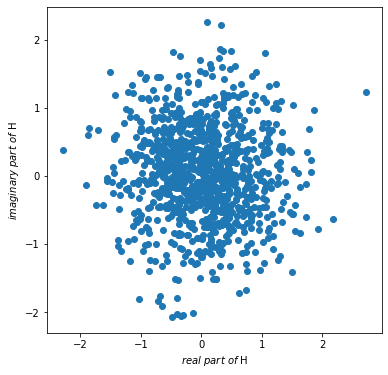

In [4]:
plt.figure(figsize=(6, 6))
plt.scatter(H.real, H.imag)
plt.xlabel("$\it{real \ part \ of}$ H")
plt.ylabel("$\it{imaginary \ part \ of}$ H")
plt.show()


振幅 $r = |H|$はレイリー分布に従う  
cdf(累積分布関数)で確認  
理論的pdf(確率密度関数)も表示 $\frac{x}{\sigma^{2}} \exp(-\frac{x}{2\sigma^{2}})$

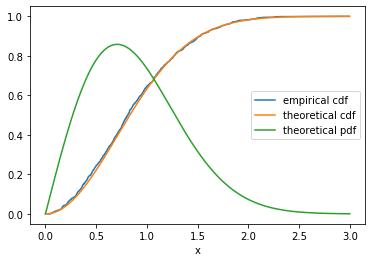

In [5]:
amp = abs(H)
plt.plot(np.sort(amp), [i/n for i in range(n)], label="empirical cdf")
x = np.linspace(0,3,1000)
plt.plot(x, rayleigh.cdf(x, scale= np.sqrt(0.5)), label="theoretical cdf")
plt.plot(x, rayleigh.pdf(x, scale= np.sqrt(0.5)), label="theoretical pdf")
plt.xlabel("x")
plt.legend()

10~90%タイルを求め、そのような振幅値を図示する  
確率密度関数におけるピークをとる値を計算し、そのピーク値($x=\sigma$)を図示する

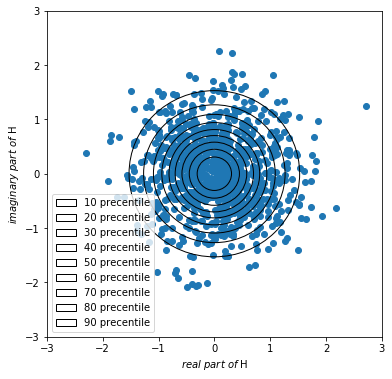

In [9]:
plt.figure(figsize=(6, 6))
ax = plt.axes()
for i in range(10,100,10):
    percentile = patches.Circle(xy=(0, 0), radius=np.sort(amp)[int(n*i/100)], fill = False, label=str(i)+" precentile")
    ax.add_patch(percentile)
ax.scatter(H.real, H.imag)
plt.yticks(range(-3,4,1))
plt.xticks(range(-3,4,1))
plt.xlabel("$\it{real \ part \ of}$ H")
plt.ylabel("$\it{imaginary \ part \ of}$ H")
plt.legend()

plt.show()

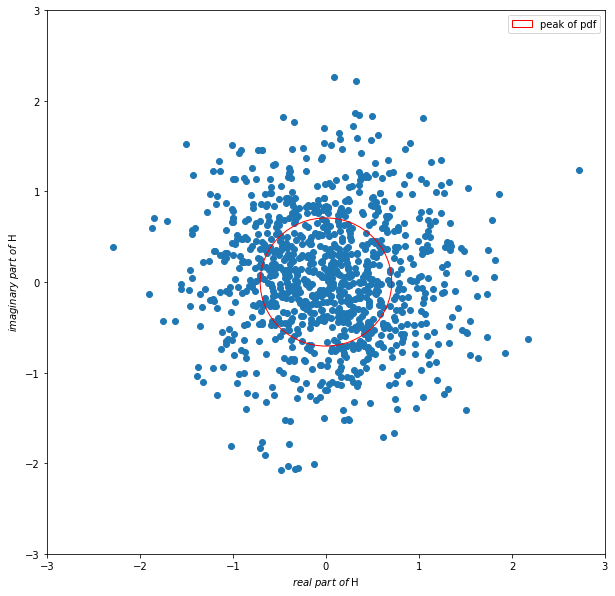

In [10]:
plt.figure(figsize=(10, 10))
ax = plt.axes()
most_occur = patches.Circle(xy=(0, 0), radius=np.sqrt(0.5), ec='r', fill = False, label="peak of pdf")
ax.add_patch(most_occur)
ax.scatter(H.real, H.imag)
plt.yticks(range(-3,4,1))
plt.xticks(range(-3,4,1))
plt.xlabel("$\it{real \ part \ of}$ H")
plt.ylabel("$\it{imaginary \ part \ of}$ H")
plt.legend()

plt.show()